# Bobcat Population Analysis

In [39]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from numpy import random as rd

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
default_number_of_years = 32

## Base Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5   154.711636     5
6   136.761632     6
7   120.824721     7
8   106.905764     8
9    94.615734     9
10   83.736099    10
11   74.112109    11
12   65.597032    12
13   58.068548    13
14   51.418291    14
15   45.539210    15
16   40.337343    16
17   35.727043    17
18   31.640480    18
19   28.020880    19
20   24.815916    20
21   21.977539    21
22   19.463702    22
23   17.237403    23
24   15.265763    24
25   13.519638    25
26   11.973233    26
27   10.603708    27
28    9.390834    28
29    8.316691    29
30    7.365413    30
31    6.522944    31
32    5.776838    32


[Text(0.5, 1.0, 'Wild Bobcat Population')]

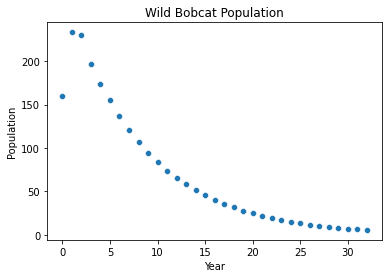

In [40]:
default_leslie_matrix = np.array([[0.32, 0.32, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.15, 1.15, 1.15, 1.15],
                         [0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Population' : nth_population,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_ex_situ = growth()

sns.scatterplot(data = data_nth_population_ex_situ, x = "Year", y = "Population").set(title = "Wild Bobcat Population")

## In-situ Model

       Population  Year
0      160.000000     0
1      283.400000     1
2      364.551000     2
3      436.625020     3
4      533.537755     4
5      659.378462     5
6      816.476326     6
7     1011.801542     7
8     1254.810158     8
9     1556.937354     9
10    1932.309667    10
11    2398.526699    11
12    2977.476937    12
13    3696.349631    13
14    4588.910176    14
15    5697.086946    15
16    7072.962384    16
17    8780.820087    17
18   10900.820052    18
19   13532.641624    19
20   16799.935634    20
21   20856.107525    21
22   25891.603462    22
23   32142.871022    23
24   39903.448538    24
25   49537.743797    25
26   61498.146761    26
27   76346.272961    27
28   94779.334716    28
29  117662.879458    29
30  146071.432573    30
31  181338.953086    31
32  225121.471343    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

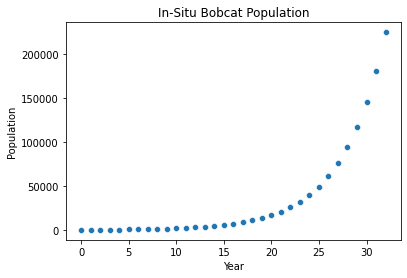

In [41]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_in_situ = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

## Extended Model

    Population  Year
0   160.000000     0
1   233.200000     1
2   229.780000     2
3   196.577680     3
4   173.715059     4
5   119.968624     5
6   105.819305     6
7    93.472394     7
8    82.740819     8
9    73.234582     9
10   50.166036    10
11   44.402299    11
12   39.301632    12
13   34.794220    13
14   30.814753    14
15   21.131685    15
16   18.719463    16
17   16.577997    17
18   14.680421    18
19   13.001139    19
20    8.914201    20
21    7.894486    21
22    6.991447    22
23    6.191774    23
24    5.483554    24
25    3.759619    25
26    3.329585    26
27    2.948740    27
28    2.611458    28
29    2.312755    29
30    1.585667    30
31    1.404295    31
32    1.243670    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

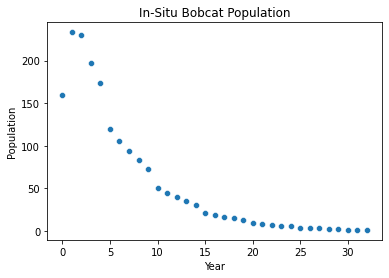

In [42]:
default_catastrophie_matrix = np.identity(16)
for i in range(0,16):
    default_catastrophie_matrix[i][i] = 0.2

def growth_extended(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    nth_population_extended = np.zeros(number_of_years+1)
    nth_population_extended[0] = np.sum(t0_population)
    current_population = t0_population
    nth_year = np.arange(number_of_years+1)
    for i in range(1, number_of_years+1):
        if (i % 5 == 0):
            nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population) - catastrophie_matrix.dot(current_population)
        else:
            nth_population_extended[i] = np.sum(leslie_matrix.dot(current_population))
            current_population = leslie_matrix.dot(current_population)


    df = pd.DataFrame({
        'Population' : nth_population_extended,
        'Year' : nth_year
        })

    print(df)

    return df

data_nth_population_extended_ex_situ = growth_extended()

sns.scatterplot(data = data_nth_population_extended_ex_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")

      Population  Year
0     160.000000     0
1     283.400000     1
2     364.551000     2
3     436.625020     3
4     533.537755     4
5     552.670911     5
6     684.600633     6
7     848.506276     7
8    1052.449850     8
9    1305.975322     9
10   1359.727132    10
11   1687.880327    11
12   2095.358644    12
13   2601.299925    13
14   3229.469401    14
15   3363.482980    15
16   4175.808641    16
17   5183.981809    17
18   6435.506790    18
19   7989.264304    19
20   8320.349644    20
21  10329.216078    21
22  12823.098774    22
23  15919.108345    23
24  19762.621007    24
25  20581.588272    25
26  25550.811571    26
27  31719.805491    27
28  39378.242825    28
29  48885.735032    29
30  50911.571255    30
31  63203.672643    31
32  78463.581541    32


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

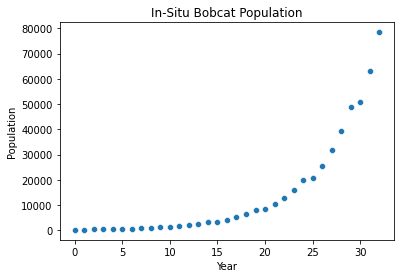

In [43]:
data_nth_population_extended_in_situ = growth_extended(leslie_matrix=leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended_in_situ, x = "Year", y = "Population").set(title = "In-Situ Bobcat Population")